In [2]:
import numpy as np
import pandas as pd
import manage_data as md
import managePeakData as mpd
import preprocessing as pp
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
df = mpd.importPeak(28).dropna().head()

In [54]:
df.head()

,Ximf0,Ximf1,Ximf2,Yimf0,Yimf1,Yimf2,coil,speed,sticking,thickness,time_begin,time_end
0,2.40024,5.20052,4.00040,4.989267,4.644295,4.274771,28,745.409568,False,0.7,60.0,64.0
1,2.00020,6.00060,4.40044,14.746767,4.816534,5.081753,28,840.895968,False,0.7,64.0,68.0
2,2.00020,2.00020,6.80068,5.016284,3.573306,2.816386,28,936.384421,False,0.7,68.0,72.0
3,6.40064,6.40064,6.40064,6.405078,4.418592,3.990019,28,1032.000024,False,0.7,72.0,76.0
4,2.00020,2.00020,2.00020,22.992296,7.079908,16.370910,28,1128.649811,False,0.7,76.0,80.0


In [118]:
def create_XY_df(coil_list):
    feature_col = ['Ximf0', 'Ximf1', 'Ximf2', 'Yimf0', 'Yimf1', 'Yimf2', 'thickness', 'speed']
    X = pd.DataFrame(columns=feature_col)
    Y = pd.DataFrame(columns=['sticking'])
    for coil in coil_list:
        df = mpd.importPeak(coil).dropna()
        X = X.append(df[feature_col])
        Y = Y.append(df[['sticking']])
    return X, Y

In [133]:
coil_list = [0,1,28,44,8,9]
X_train, Y_train = create_XY_df(coil_list)
np.array(X_train.values[:,0]).shape
X_train.values[:,:]

array([[  4.40044000e+00,   2.00020000e+00,   2.00020000e+00, ...,
          3.62344241e+00,   6.00000000e-01,   8.05597795e+02],
       [  2.40024000e+00,   8.00080000e+00,   2.80028000e+00, ...,
          5.11921333e+00,   6.00000000e-01,   9.01537528e+02],
       [  6.00060000e+00,   2.00020000e+00,   1.60016000e+00, ...,
          7.53783029e+00,   6.00000000e-01,   9.97256889e+02],
       ..., 
       [  1.60016000e+00,   1.60016000e+00,   1.60016000e+00, ...,
          2.67451514e+00,   7.50000000e-01,   4.64154633e+02],
       [  1.60016000e+00,   1.60016000e+00,   1.60016000e+00, ...,
          4.07225436e+00,   7.50000000e-01,   5.59701214e+02],
       [  2.00020000e+00,   2.00020000e+00,   2.40024000e+00, ...,
          2.10225009e+00,   7.50000000e-01,   6.50892980e+02]])

In [114]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, list(Y_train.sticking))

AttributeError: 'list' object has no attribute 'sticking'

In [105]:
coil_list = [54,27,10,11,6,7,19]
coil_list = range(2,8)+range(10,28)+range(32,44)+range(45,88)
X_test, Y_test = create_XY_df(coil_list)
Y_predict = clf.predict(X_test.values)
y_true = list(Y_test.values[:,0])
y_predict = list(Y_predict)

In [106]:
from sklearn import metrics
m = metrics.confusion_matrix(y_true, y_predict, labels=[True, False])
m

array([[  48,  303],
       [ 144, 1708]])

In [107]:
coil_list = [54,27,10,11,6,7,19,20,21,33]
coil_list = range(2,8)+range(10,28)+range(32,44)+range(45,88)
sum_true = []
sum_predict = []
for coil in coil_list:
    X_test, Y_test = create_XY_df([coil])
    Y_predict = clf.predict(X_test.values)
    y_true = list(Y_test.values[:,0])
    y_predict = list(Y_predict)
    sum_true.append(sum(y_true))
    sum_predict.append(sum(y_predict))
len(sum_true)

79

In [95]:
diff = np.abs(np.array(sum_true)-np.array(sum_predict))
sum(diff<=5)*1./len(diff)*100

65.822784810126578

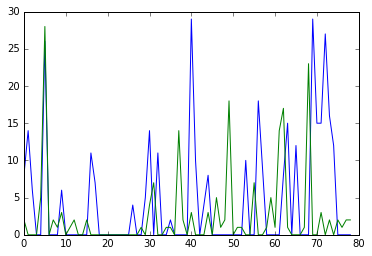

In [108]:
plt.plot(sum_true)
plt.plot(sum_predict)

In [98]:
y_true

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [94]:
from sklearn import metrics
m = metrics.confusion_matrix(y_true, y_predict, labels=[True, False])
m

array([[ 0,  0],
       [ 2, 27]])

In [64]:
sum(m[:,0])

2

In [89]:
[2,3]-[2]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [47]:
88-32

56

In [262]:
Y_test['prediction'] = pd.DataFrame(clf.predict(X_test))

In [264]:
sum(Y_test[Y_test.sticking==Y_test.prediction])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
data = []
prediction = []
for coil in range(88):
    try:
        df = mpd.importPeak(coil)
        Xi = zip(
                list(df['Ximf0']), list(df['Yimf0']), 
                list(df['Ximf1']), list(df['Yimf1']), 
                list(df['Ximf2']), list(df['Yimf2'])
                )
        Yi = list(df['sticking'])
        data.append(sum(Yi)>0)
        prediction.append(sum(clf.predict(Xi))>5)
        print coil, sum(Yi), sum(clf.predict(Xi))
    except:
        pass
data = np.array(data)
prediction = np.array(prediction)
sum(data), sum(prediction)
sum(data==prediction)/88.*100

In [ ]:
sum(data)

In [ ]:
x_index = 2
y_index = 3

x = np.array(X)
y = np.logical_and(pp.is_between(x[:,x_index], 3, 5), x[:,y_index]>10)

xx = x[:,2:4]

# this formatter will label the colorbar with the correct target names
# formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(x[:,x_index], x[:,y_index], c=y)
plt.colorbar(ticks=[0, 1])
#plt.xlabel(iris.feature_names[x_index])
#plt.ylabel(iris.feature_names[y_index])
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xx, y)

In [ ]:
data = []
prediction = []
for coil in range(88):
    try:
        df = mpd.importPeak(coil)
        Xi = zip(df['Ximf1'].values, df['Yimf1'].values)
        Yi = df['sticking'].values
        print coil, sum(Yi), sum(clf.predict(Xi))
        data.append(sum(Yi)>0)
        prediction.append(sum(clf.predict(Xi))>5)
    except:
        pass
data = np.array(data)
prediction = np.array(prediction)
sum(data), sum(prediction)
sum(data==prediction)/88.*100

In [ ]:
xx

In [ ]:
df = mpd.importPeak(28)
Xi = zip(df['Ximf1'].values, df['Yimf1'].values)
Xi
sum(clf.predict(Xi))

In [ ]:
a = zip([5,6],[5,6])

In [ ]:
a

In [ ]:
list(a[0])

In [ ]:
x = np.array(X)
y = np.array(Y)

In [ ]:
x.shape

In [ ]:
x[0,0]

In [ ]:
data = np.array(data)
prediction = np.array(prediction)
sum(data), sum(prediction)
sum(data==prediction)

In [ ]:
sum(data==prediction)

In [ ]:
x[:,0]>20